### Download the data

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" 
HOUSING_PATH  = "datasets/housing"
HOUSING_URL   = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

print(HOUSING_URL)

https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz


In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data()

housing = load_housing_data(HOUSING_PATH)
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

### Take a Quick look at the Data Structure

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing.ocean_proximity.value_counts() # useful for non numeric variables

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe() # useful for numeric variables

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

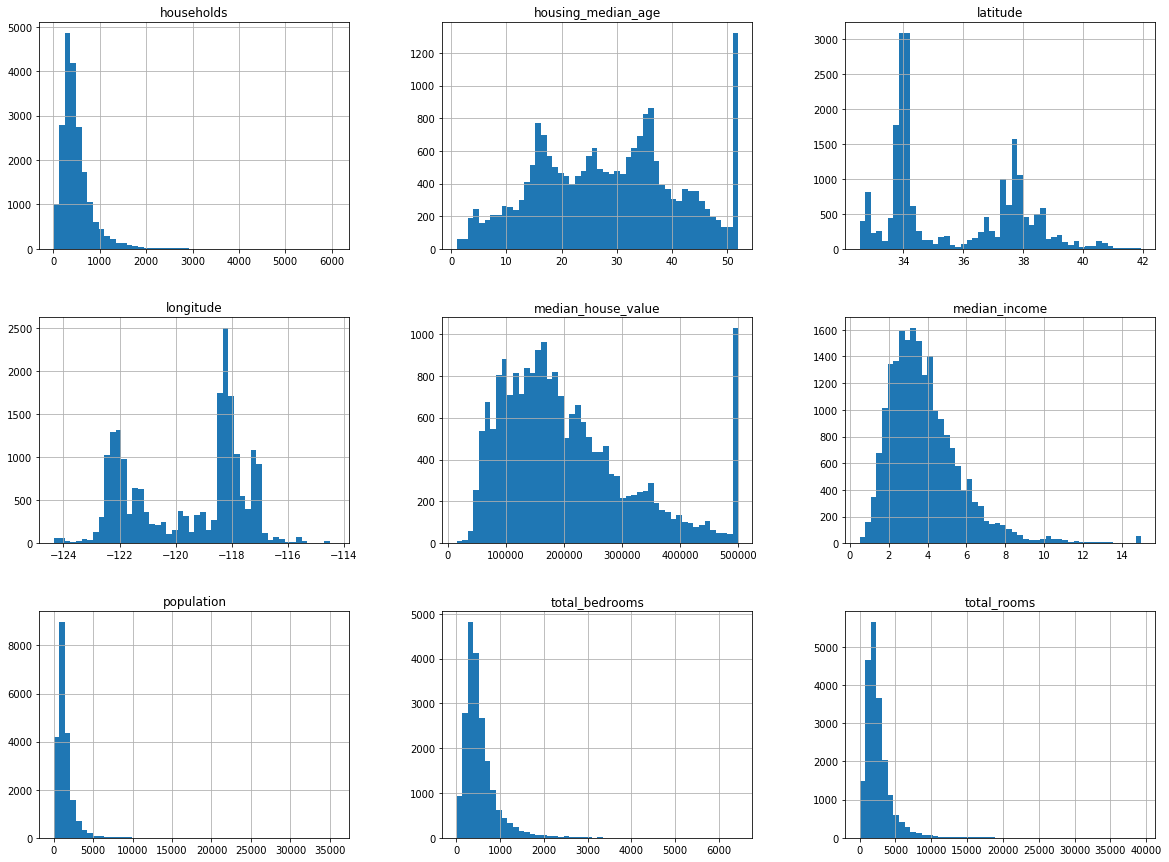

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

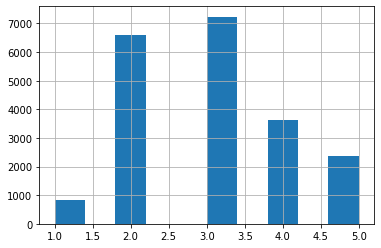

In [12]:
housing.income_cat.hist()

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing.income_cat):
    strat_train_set = housing.iloc[train_index]
    strat_test_set  = housing.iloc[test_index]
    

print(strat_train_set.income_cat.value_counts()/len(strat_train_set), '\n')
print(housing.income_cat.value_counts()/len(housing))


3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64 

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


In [14]:
strat_train_set.drop('income_cat', axis=1, inplace=True)
strat_test_set.drop('income_cat', axis=1, inplace=True)

housing = strat_train_set.copy()

housing.head()

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  median_house_value  \
17606       710.0       339.0         2.7042            286600.0   
18632       306.0       113.0         6.4214            340600.0   
14650       936.0       462.0         2.8621            196900.0   
3230       1460.0       353.0         1.8839             46300.0   
3555       4459.0      1463.0         3.0347            254500.0   

      ocean_proximity  
17606       <1H OCEAN  
18632       <1H OCEAN  
14650      NEAR OCEAN  
3230           INLAND  
3555        <1H OCEAN

### Visualising Geographical data

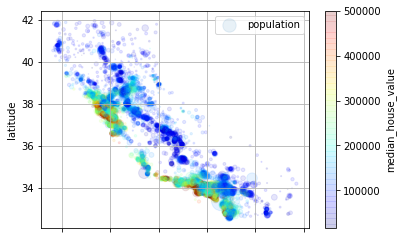

In [15]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1,
            s=housing['population']/100, label="population",
            c="median_house_value", cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.grid()
plt.show()

### Looking for Correlations

In [16]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

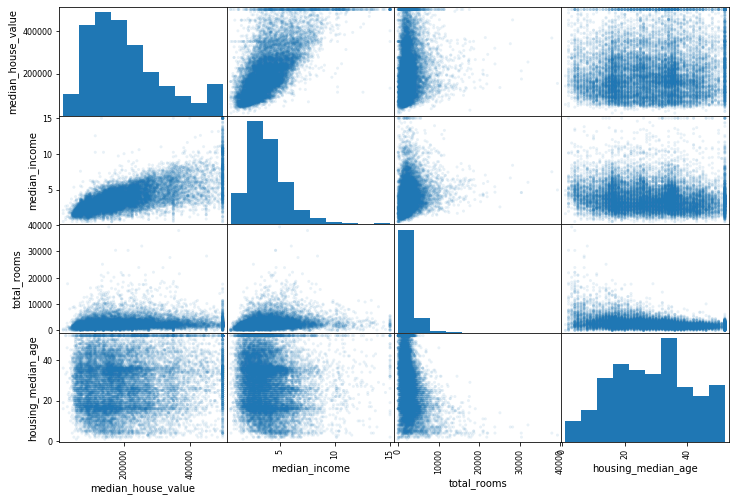

In [17]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.1)
plt.show()

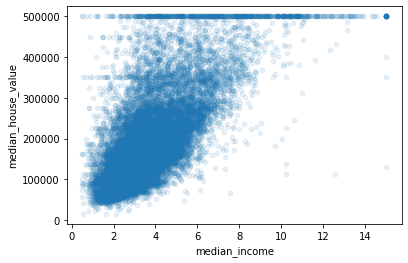

In [18]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

### Experimenting with Attribute Combinations

In [19]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room']   = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']


corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Data cleaning

In [20]:
housing          = strat_train_set.drop('median_house_value', axis=1) # drop is automatically creating a copy of dataframe
housing_labels   = strat_train_set['median_house_value'].copy()

# Total bedrooms has missing values so either remove them or replace them with some value

housing.dropna(subset=["total_bedrooms"], inplace=False)

# or

median = housing['total_bedrooms'].median() # Use the same median for Test set and beyond

housing['total_bedrooms'].fillna(median, inplace=True) 
# Inplace is needed to actually change the dataframe itself rather than its copy



In [21]:
from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+

imputer = SimpleImputer(strategy='median')

# Create dataframe with only numerical features to calculate and apply median to all features
housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)

# print('medians of all features:', imputer.statistics_)

X = imputer.transform(housing_num)
print(type(X))

housing_tr = pd.DataFrame(X, columns=housing_num.columns)



<class 'numpy.ndarray'>


### Handling text and categorical attributes

In [22]:
housing_cat = housing[['ocean_proximity']].copy() # use double brackets for array
# or reshape later using housing_cat.values.reshape(-1,1)

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
print(ordinal_encoder.categories_)
housing_cat_encoded[:10]

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [23]:
# One issue with above is ML algorith will assume two nearby values are more similar than two distant values
# To avoid this we can use one-hot encoding

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(type(housing_cat_1hot))
print(housing_cat_1hot.toarray())

# This is a sparse scipy array. Very handy when there are thousands of categories to be encoded.
# Sparse array takes up much less memory


<class 'scipy.sparse.csr.csr_matrix'>
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


### Custom Transformers

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix,  bedrooms_ix, population_ix , households_ix = 3,4,5,6

# sklearn objects acre consistent as in they output numpy array. We'll do the same

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # no args or **kwargs needed because of BaseEstimator
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else needed to be done
    def transform(self, X, y=None):
        rooms_per_household       = X[:, rooms_ix]/X[:, households_ix]
        population_per_household  = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room] # numpy array
        else:
            return np.c_[X, rooms_per_household, population_per_household] # numoy array
        
        

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

housing_extra_attributes = attr_adder.transform(housing.values)
cols = np.append(housing.columns.values, [['rph', 'pph']])
housing_extra_attributes = pd.DataFrame(housing_extra_attributes, columns=cols)

housing_extra_attributes.head()


longitude latitude housing_median_age total_rooms total_bedrooms population  \
0   -121.89    37.29                 38        1568            351        710   
1   -121.93    37.05                 14         679            108        306   
2    -117.2    32.77                 31        1952            471        936   
3   -119.61    36.31                 25        1847            371       1460   
4   -118.59    34.23                 17        6592           1525       4459   

  households median_income ocean_proximity      rph      pph  
0        339        2.7042       <1H OCEAN  4.62537   2.0944  
1        113        6.4214       <1H OCEAN  6.00885  2.70796  
2        462        2.8621      NEAR OCEAN  4.22511  2.02597  
3        353        1.8839          INLAND  5.23229  4.13598  
4       1463        3.0347       <1H OCEAN  4.50581  3.04785

### Feature Scaling
1. Min-Max Scaling: Bounds values between 0-1 (required by some ML algorithms) but strongly affected by outlier (squishes values to very small values)
2. Standardisation: Does not bound and is not much affected by outlier

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True, copy=True)
scaled_data = scaler.fit_transform(housing_num)
scaled_data = pd.DataFrame(scaled_data, columns=housing_num.columns)
scaled_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.156043  0.771950            0.743331    -0.493234       -0.445438   
1  -1.176025  0.659695           -1.165317    -0.908967       -1.036928   
2   1.186849 -1.342183            0.186642    -0.313660       -0.153345   
3  -0.017068  0.313576           -0.290520    -0.362762       -0.396756   
4   0.492474 -0.659299           -0.926736     1.856193        2.412211   

   population  households  median_income  
0   -0.636211   -0.420698      -0.614937  
1   -0.998331   -1.022227       1.336459  
2   -0.433639   -0.093318      -0.532046  
3    0.036041   -0.383436      -1.045566  
4    2.724154    2.570975      -0.441437

### Transformation Pipelines

The constructore takes list of name/estimator pairs defining a sequence of steps.  
All but the last estimator must be transformers must be transformers (i.e., they must have fit_transform() method).  
The names must not contain double underscores "__"


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

housing_num_tr = num_pipeline.fit_transform(housing_num)



In [27]:
# But to apply pipelines separately to numerical and categorical attributes lets define an object 
# that selects specified attributes first and drops the rest and then use this along with transformers in pipeline.
# This allows to directly input the entire DataFrame instead of selecting numerical attributes first and then using Pipeline


from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attribute_names].values # output a numpy array
    
num_attributes = housing_num.columns.values
cat_attributes = ['ocean_proximity']

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attributes)),
                        ('imputer', SimpleImputer(strategy='median')), 
                        ('attribs_adder', CombinedAttributesAdder()),
                        ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True))])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attributes)),
                        ('cat_encoder', OneHotEncoder())])


housing_num_tr = num_pipeline.fit_transform(housing)
housing_cat_tr = cat_pipeline.fit_transform(housing)



In [28]:
# To combine these two pipelines

from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared.shape

(16512, 16)

### Training and evaluating on the Traning set

In [29]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

# To avoid less number of resulting columns after OneHotEncoding because we only want a subset of housing,
# as not all possible values of 'ocean_proximity' may be in the subset, use prepared data itself

some_data_prepared  = housing_prepared[:5]
some_labels         = housing_labels.iloc[:5]

print('Predictions: ', lin_reg.predict(some_data_prepared))
print('Actual labels: ', some_labels.values, '\n')


from sklearn.metrics import mean_squared_error

housing_predictions   = lin_reg.predict(housing_prepared)
lin_mse               = mean_squared_error(housing_labels, housing_predictions)
lin_rmse              = np.sqrt(lin_mse)
print('Linear Regression rmse: ',lin_rmse)

# This is very high prediction error and model is underfitting. Let's try another model

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse            = mean_squared_error(housing_labels, housing_predictions)
tree_rmse           = np.sqrt(tree_mse)
print('Decision tree rmse: ', tree_rmse)

# 0 error! means model is severyly over fitting. A good way is to use cross validation using validation sets

Predictions:  [210644.6046746  317768.80655137 210956.43335588  59218.98893493
 189747.55852099]
Actual labels:  [286600. 340600. 196900.  46300. 254500.] 

Linear Regression rmse:  68628.19819848923
Decision tree rmse:  0.0


### Better Evaluation using Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

scores              = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                                      scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores    = np.sqrt(-scores) # since cross val uses utility function instead of cost function use -ve sign

def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', np.mean(scores))
    print('Std:', np.std(scores))
    
    
display_scores(tree_rmse_scores)

lin_scores          = cross_val_score(lin_reg, housing_prepared, housing_labels,
                                     scoring='neg_mean_squared_error', cv=10)

lin_rmse_scores     = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
# The prediction error is worse than Linear Regression possibly due to severe overfitting


from sklearn.ensemble import RandomForestRegressor

forest_reg          = RandomForestRegressor()
# forest_reg.fit(housing_prepared, housing_labels)

# forest_scores       = cross_val_score(forest_reg, housing_prepared, housing_labels,
#                                      scoring='neg_mean_squared_error', cv=10)

# forest_rmse_scores  = np.sqrt(-forest_scores)

# display_scores(forest_rmse_scores)

## Random Forest performs the best among models so far evaluated
## let's save this

from sklearn.externals import joblib

# joblib.dump(forest_reg, 'forest_regressor_default.joblib')

## and later re-use it
# forest_reg_model = joblib.load('forest_regressor_default.joblib')


Scores: [69038.21866531 66381.65129381 69233.51474405 69775.54162977
 70587.1129047  75082.28589221 71491.7510393  70190.83038186
 75664.22845627 68748.93564232]
Mean: 70619.40706495891
Std: 2700.0632523032014
Scores: [66782.73844684 66960.11767588 70347.95253181 74739.57052674
 68031.13389731 71193.84183954 64969.63057291 68281.61138374
 71552.91568168 67665.10080501]
Mean: 69052.46133614599
Std: 2731.6740368518667


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Grid Search

In [32]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators':[3,10,30], 'max_features': [2,4,6,8]}, 
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
             ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared, housing_labels)


CPU times: user 4min 54s, sys: 124 ms, total: 4min 55s
Wall time: 4min 55s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [52]:
# Get the best parameters

print(grid_search.best_params_, "\n")

# Get the best estimators
print(grid_search.best_estimator_)

# If GridSearchCV is initialised with refit=True (default) then once it finds the best combination
# it will retrain the best model on the entire training set, this will likely improve performance.


{'max_features': 8, 'n_estimators': 30} 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [54]:
# Evaluation scores can be queried by

cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


62966.87414636288 {'max_features': 2, 'n_estimators': 3}
55788.57722169513 {'max_features': 2, 'n_estimators': 10}
52992.403046263455 {'max_features': 2, 'n_estimators': 30}
61000.89165509929 {'max_features': 4, 'n_estimators': 3}
52498.69558704953 {'max_features': 4, 'n_estimators': 10}
50691.8677717896 {'max_features': 4, 'n_estimators': 30}
59020.021371540715 {'max_features': 6, 'n_estimators': 3}
52276.37994585202 {'max_features': 6, 'n_estimators': 10}
50091.34781892498 {'max_features': 6, 'n_estimators': 30}
58456.986382047166 {'max_features': 8, 'n_estimators': 3}
52234.57501914335 {'max_features': 8, 'n_estimators': 10}
49779.130281287216 {'max_features': 8, 'n_estimators': 30}
62840.50840559529 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54077.80069912943 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60636.12527075251 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52723.34903236593 {'bootstrap': False, 'max_features': 3, 'n_estimators':

### Randomized Search
If the search space of parameters is large then use **RandomizedSearchCV** as this will randomise the search space and same time. It can be used much in the same way as GridSearchCV

### Analyse the best model and its error

In [66]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

extra_attribs = ['rooms_per_hhold', 'population_per_hhold', 'bedrooms_per_hhold']
cat_encoder   = cat_pipeline.named_steps['cat_encoder']
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes      = list(num_attributes) + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

# We may drop the features with less importance


[7.00404512e-02 5.98946726e-02 4.38662635e-02 1.50701559e-02
 1.45506291e-02 1.45075426e-02 1.47898901e-02 3.93205849e-01
 4.11257510e-02 1.08814158e-01 6.06774557e-02 8.68962404e-03
 1.49166243e-01 7.65550380e-05 2.36733080e-03 3.15742816e-03]


[(0.39320584898747674, 'median_income'),
 (0.14916624300150075, 'INLAND'),
 (0.10881415842059829, 'population_per_hhold'),
 (0.07004045117509988, 'longitude'),
 (0.06067745567359915, 'bedrooms_per_hhold'),
 (0.059894672588633256, 'latitude'),
 (0.043866263472522815, 'housing_median_age'),
 (0.04112575103554095, 'rooms_per_hhold'),
 (0.015070155899221054, 'total_rooms'),
 (0.01478989005512988, 'households'),
 (0.014550629072593598, 'total_bedrooms'),
 (0.014507542583083614, 'population'),
 (0.008689624037166764, '<1H OCEAN'),
 (0.0031574281562657, 'NEAR OCEAN'),
 (0.002367330803588576, 'NEAR BAY'),
 (7.655503797885116e-05, 'ISLAND')]

### Evaluating on Test data

In [68]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared     = full_pipeline.transform(x_test)
final_predictions   = final_model.predict(x_test_prepared)

final_rmse          = np.sqrt(mean_squared_error(y_test, final_predictions))

print(final_rmse, "This may be worse than Validation error")


47766.92364073548 This may be worse than Validation error
